In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem


In [5]:
test_path = "/Users/selin/Desktop/final_k21_3_3_h16384_8192_2048_a_1_b_0_plm_lora_scores.csv"
test = pd.read_csv(file_path)

,pdb_path,lddt,rmsd,tm_score,smooth_lddt
0,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.468340,15.021489,0.259880,0.272264
1,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.463844,21.002892,0.211649,0.227126
2,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.430764,20.757952,0.184734,0.157618
3,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.452033,20.815439,0.236268,0.158196
4,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.457880,27.497400,0.177429,0.095656
...,...,...,...,...,...
908,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.481266,17.684835,0.214980,0.194335
909,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.515428,63.399685,0.154460,0.049365
910,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.488331,29.510315,0.168359,0.124127
911,/mnt/data/large/zip_file/final_data_PDB/test/t...,0.486299,28.937614,0.156097,0.126508


In [7]:
print(f"lddt: {casp_test["lddt"].mean()}")
print(f"rmsd: {casp_test["rmsd"].mean()}")
print(f"tm: {casp_test["tm_score"].mean()}")
print(f"smooth_lddt: {casp_test["smooth_lddt"].mean()}")

lddt: 0.42946634258111516
rmsd: 25.702428844907327
tm: 0.2291027182812041
smooth_lddt: 0.11883851804190107


In [ ]:
# Define the bootstrapping function
def bootstrap_ci(data, n_bootstrap=1000, ci=0.95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (1 - ci) / 2 * 100)
    upper = np.percentile(means, (1 + ci) / 2 * 100)
    return np.mean(means), lower, upper

[[0.00309017 0.00294616 0.00371918]
 [0.00296649 0.00276149 0.00392113]]


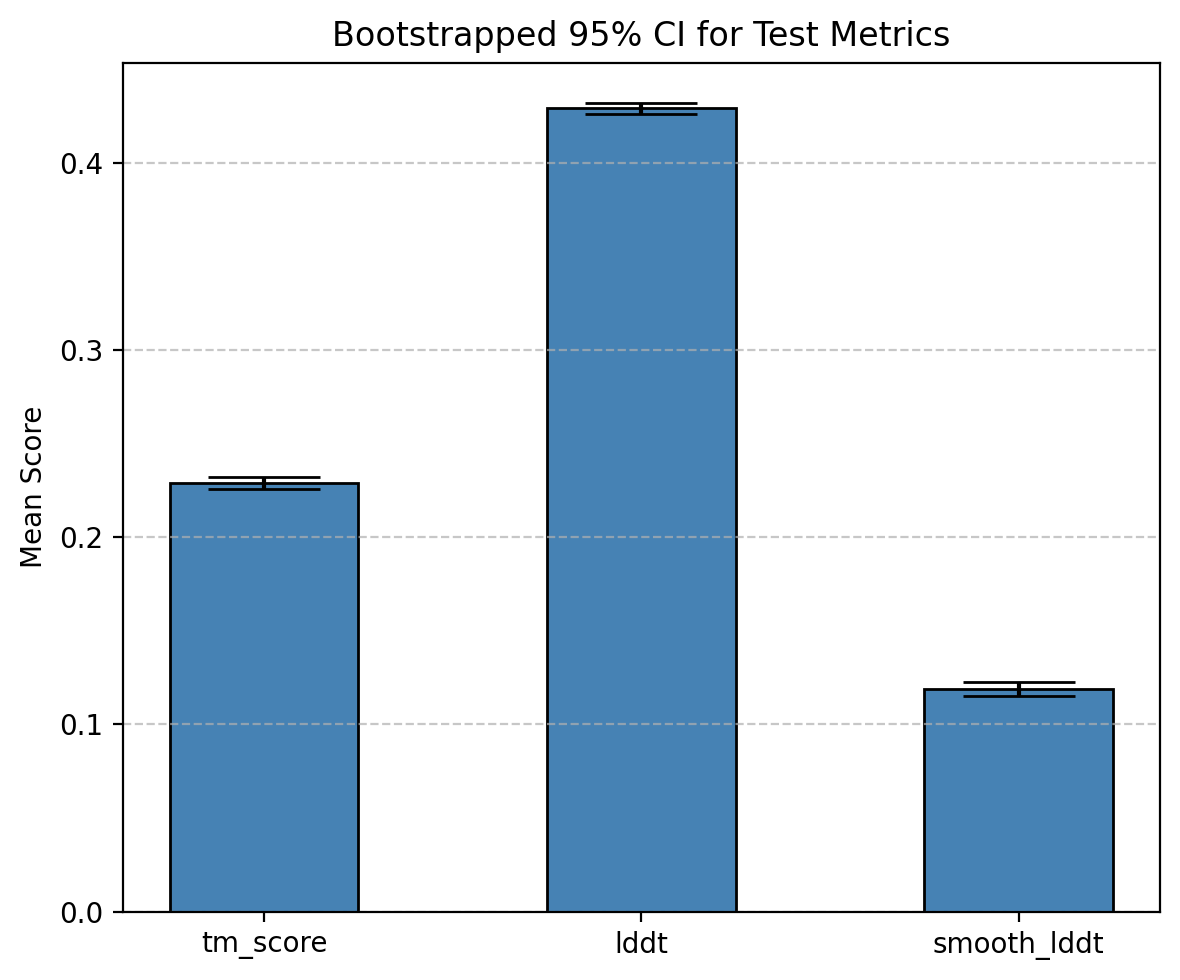

In [26]:
# Calculate bootstrap CIs for selected metrics
results = {}
for col in ['tm_score', 'lddt', 'smooth_lddt']:
    data = test[col].dropna().values
    mean, lower, upper = bootstrap_ci(data)
    results[col] = {
        'mean': mean,
        'lower_ci': lower,
        'upper_ci': upper
    }
metrics = list(results.keys())
means = [results[m]['mean'] for m in metrics]
errors = [(results[m]['mean'] - results[m]['lower_ci'], results[m]['upper_ci'] - results[m]['mean']) for m in metrics]

# Transponiere error tuples für plt.errorbar
yerr = np.array(errors).T

# Plot
plt.figure(figsize=(6, 5), dpi=200)
plt.bar(metrics, means, yerr=yerr, capsize=20, color='steelblue', edgecolor='black', width=0.5)
plt.ylabel("Mean Score")
plt.title("Bootstrapped 95% CI for Test Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

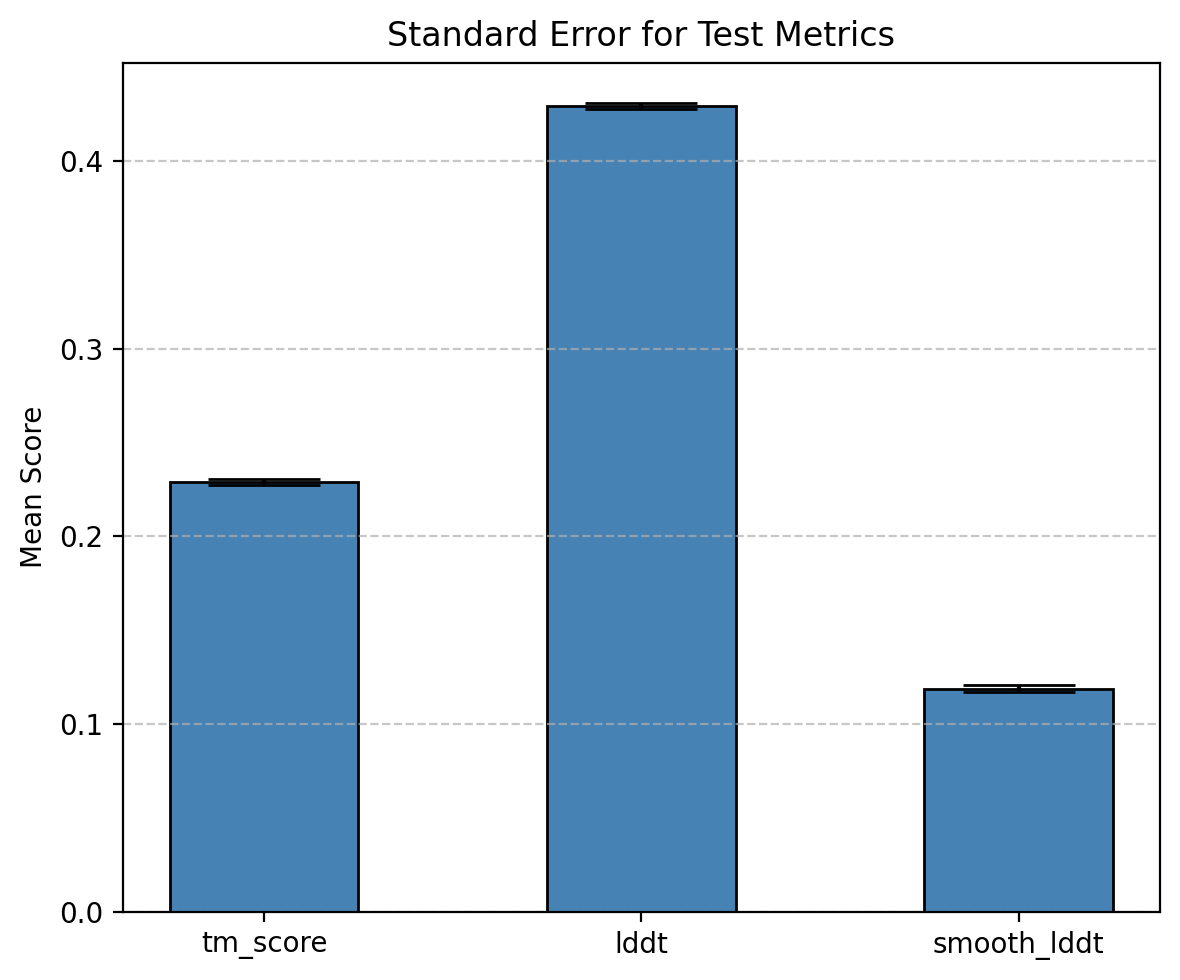

In [24]:
metrics = ['tm_score', 'lddt', 'smooth_lddt']
means = [test[col].mean() for col in metrics]
errors = [sem(test[col].dropna()) for col in metrics]  # Standard error of the mean

# Plot
plt.figure(figsize=(6, 5), dpi=200)
plt.bar(metrics, means, yerr=errors, capsize=20, color='steelblue', edgecolor='black', width=0.5)
plt.ylabel("Mean Score")
plt.title("Standard Error for Test Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()